In [129]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Lade den Datensatz
df = pd.read_csv('C:/Users\heppl/DS Projehtarbeit/Data/day.csv')

# "instant" Spalte löschen
df.drop(columns=["instant"], inplace=True)

# Ersetze die Zahlen in 'season' durch die entsprechenden Wörter
df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Ersetze die Zahlen in 'weathersit' durch die entsprechenden Wetterkategorien
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Few Clouds', 3: 'Partly Cloudy'}) # in der Variablenbeschreibung des Datensatzes wird 3 doppelt geführt. max ist 3

# Spalten umbenennen
df = df.rename(columns={'dteday': 'date', 'mnth': 'month', 'cnt': 'distribution', 'hr': 'hour', 'yr': 'year'})

# Zeige die ersten Zeilen des Datensatzes
print(df.head())



         date  season  year  month  holiday  weekday  workingday  weathersit  \
0  2011-01-01  Winter     0      1        0        6           0  Few Clouds   
1  2011-01-02  Winter     0      1        0        0           0  Few Clouds   
2  2011-01-03  Winter     0      1        0        1           1       Clear   
3  2011-01-04  Winter     0      1        0        2           1       Clear   
4  2011-01-05  Winter     0      1        0        3           1       Clear   

       temp     atemp       hum  windspeed  casual  registered  distribution  
0  0.344167  0.363625  0.805833   0.160446     331         654           985  
1  0.363478  0.353739  0.696087   0.248539     131         670           801  
2  0.196364  0.189405  0.437273   0.248309     120        1229          1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454          1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518          1600  


In [130]:
# Zeige die grundlegenden Informationen zum Datensatz
print(df.info())

# Statistiken der numerischen Spalten anzeigen
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          731 non-null    object 
 1   season        731 non-null    object 
 2   year          731 non-null    int64  
 3   month         731 non-null    int64  
 4   holiday       731 non-null    int64  
 5   weekday       731 non-null    int64  
 6   workingday    731 non-null    int64  
 7   weathersit    731 non-null    object 
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  windspeed     731 non-null    float64
 12  casual        731 non-null    int64  
 13  registered    731 non-null    int64  
 14  distribution  731 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 85.8+ KB
None
             year       month     holiday     weekday  workingday        temp  \
count  731.0000

In [131]:
# Fehlende Werte prüfen
print(df.isnull().sum())
df = df.dropna()

date            0
season          0
year            0
month           0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
distribution    0
dtype: int64


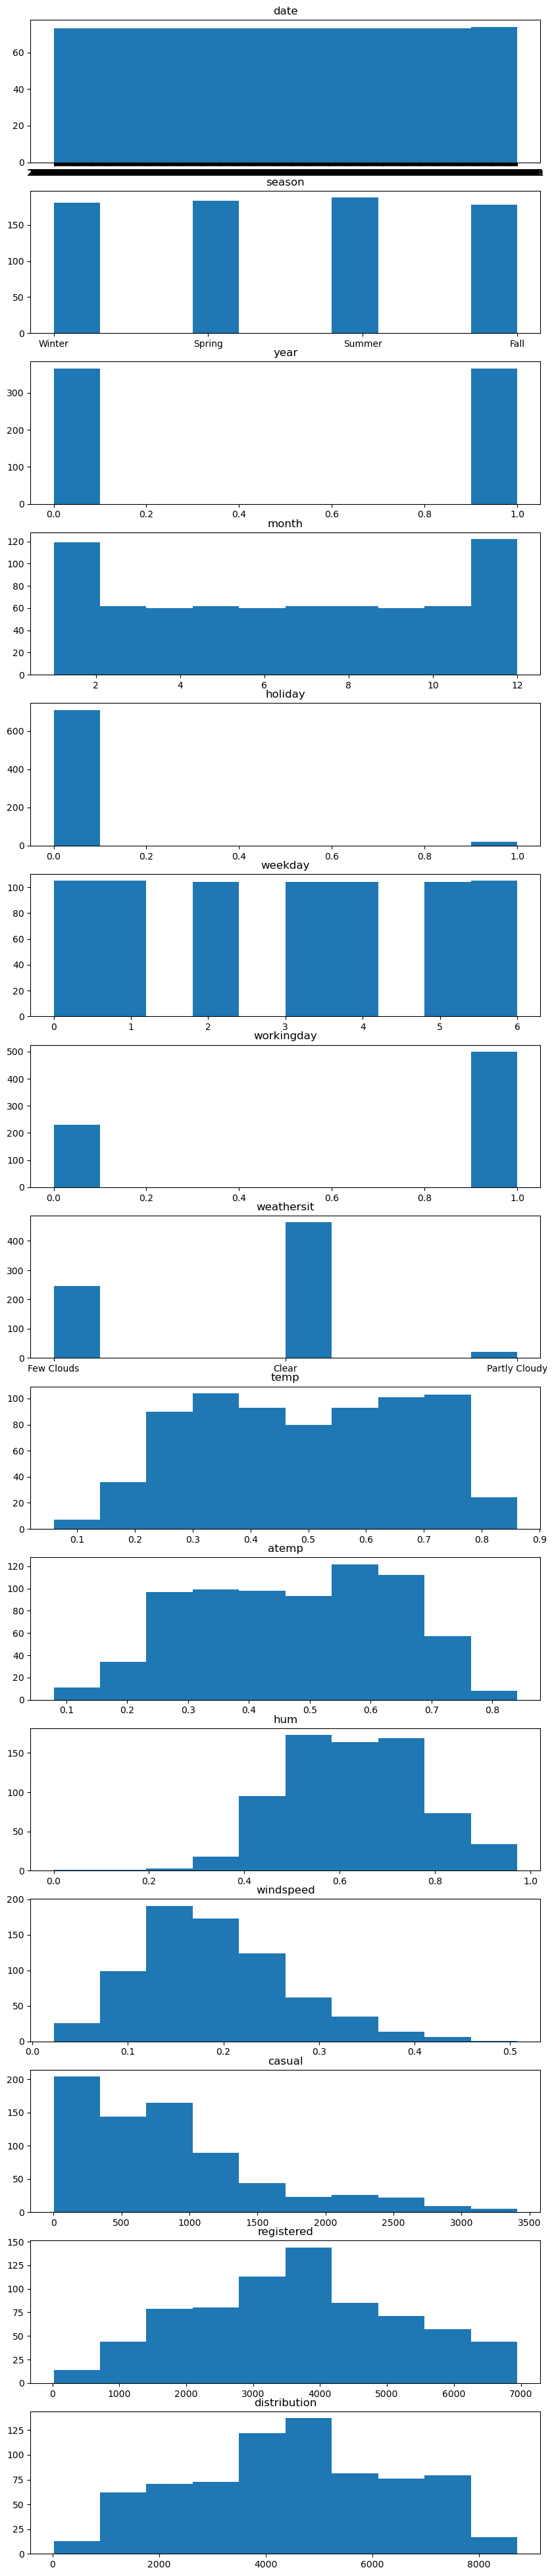

In [132]:
fig, ax = plt.subplots(df.shape[1], 1, figsize=(10, 50))
for i, column in enumerate(df.columns):
    ax[i].hist(df[column])
    ax[i].set_title(column)

c:\Users\heppl\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


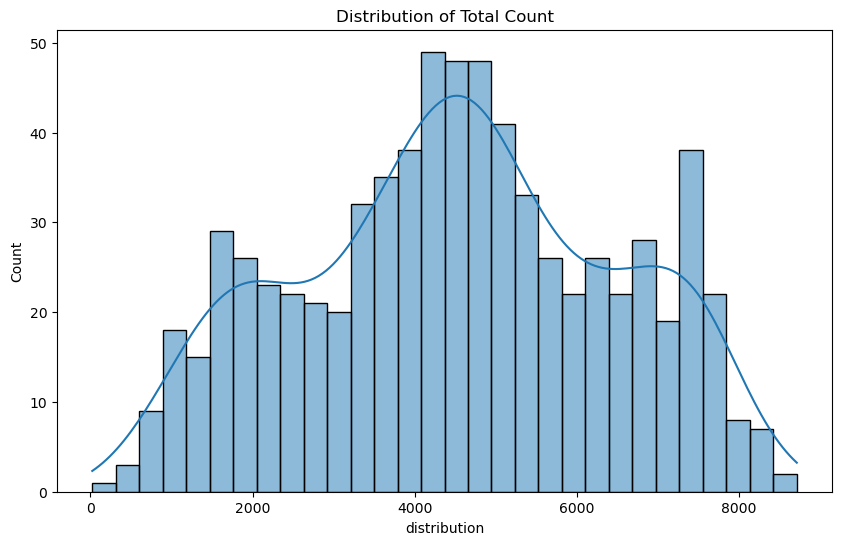

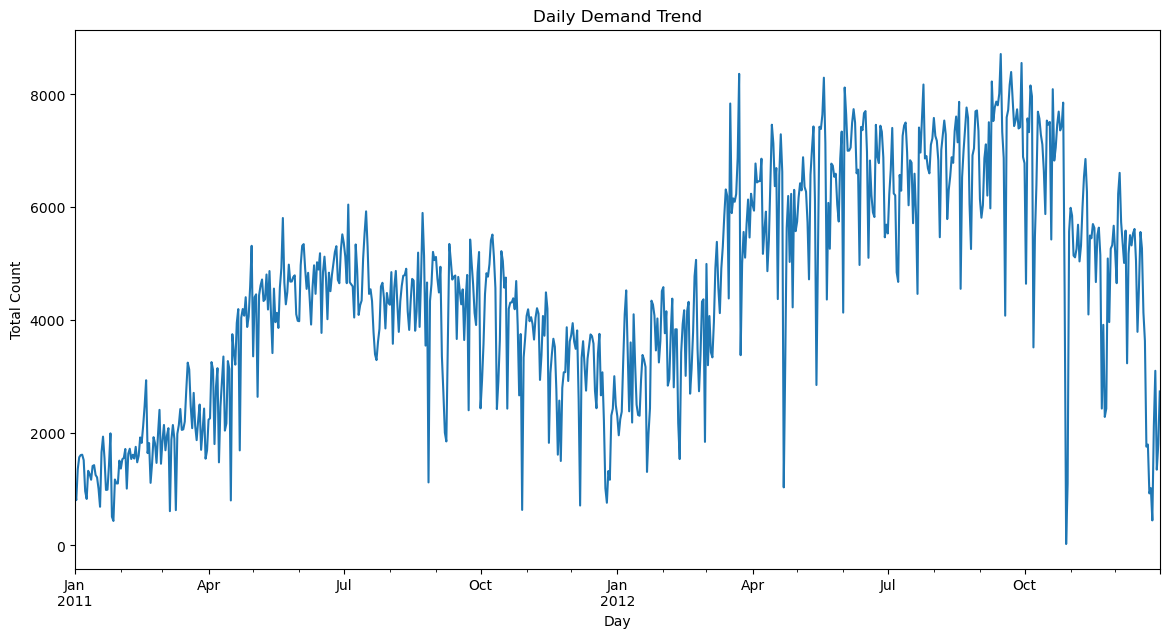

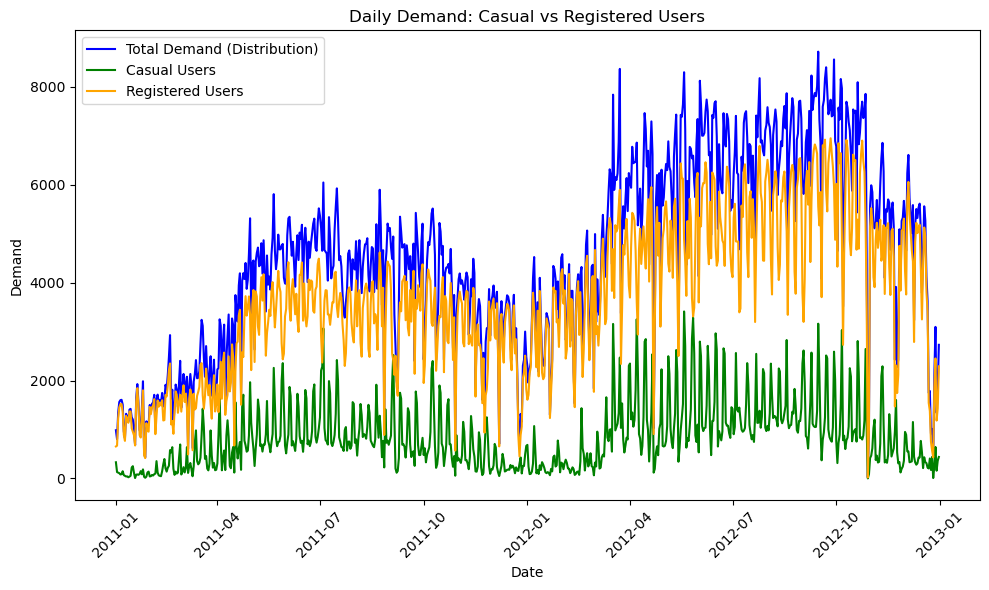

In [142]:
# Datenverteilung der Zielvariablen Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['distribution'], bins=30, kde=True)
plt.title('Distribution of Total Count')
plt.show()

# Trend über die Zeit
plt.figure(figsize=(14, 7))
df.groupby('date')['distribution'].sum().plot()
plt.title('Daily Demand Trend')
plt.xlabel('Day')
plt.ylabel('Total Count')
plt.show()



# Erstelle eine neue Figur und Achsen
plt.figure(figsize=(10, 6))

# Plot der täglichen Gesamtnachfrage (distribution)
plt.plot(df['date'], df['distribution'], label='Total Demand (Distribution)', color='blue')

# Plot der casual Nachfrage
plt.plot(df['date'], df['casual'], label='Casual Users', color='green')

# Plot der registered Nachfrage
plt.plot(df['date'], df['registered'], label='Registered Users', color='orange')

# Hinzufügen von Titel und Labels
plt.title('Daily Demand: Casual vs Registered Users')
plt.xlabel('Date')
plt.ylabel('Demand')

# Anzeige der Legende
plt.legend()

# Rotation der x-Achse für bessere Lesbarkeit der Datumswerte
plt.xticks(rotation=45)

# Plot anzeigen
plt.tight_layout()
plt.show()


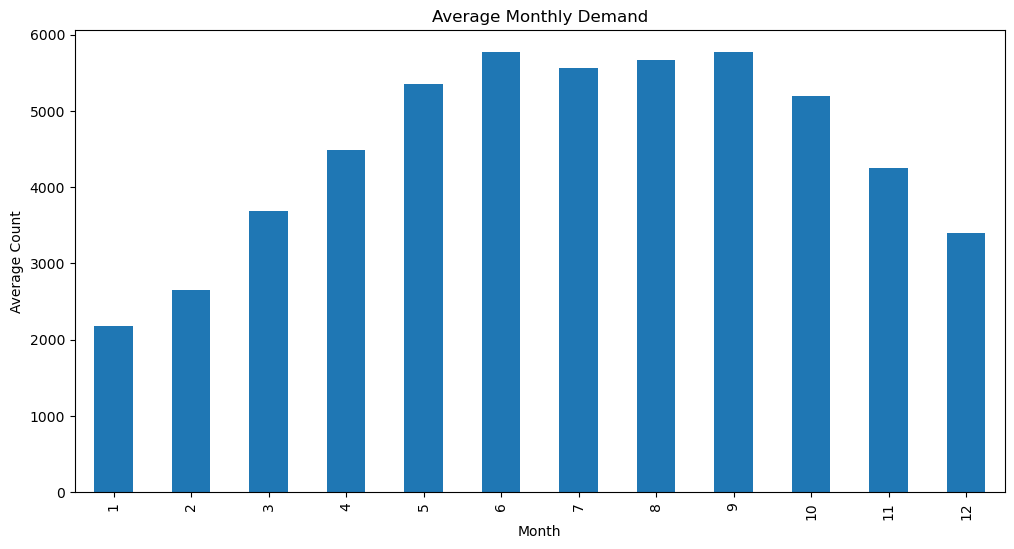

In [134]:
# Durchschnittliche monatliche Nachfrage 
plt.figure(figsize=(12, 6))
df.groupby('month')['distribution'].mean().plot(kind='bar')
plt.title('Average Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.show()

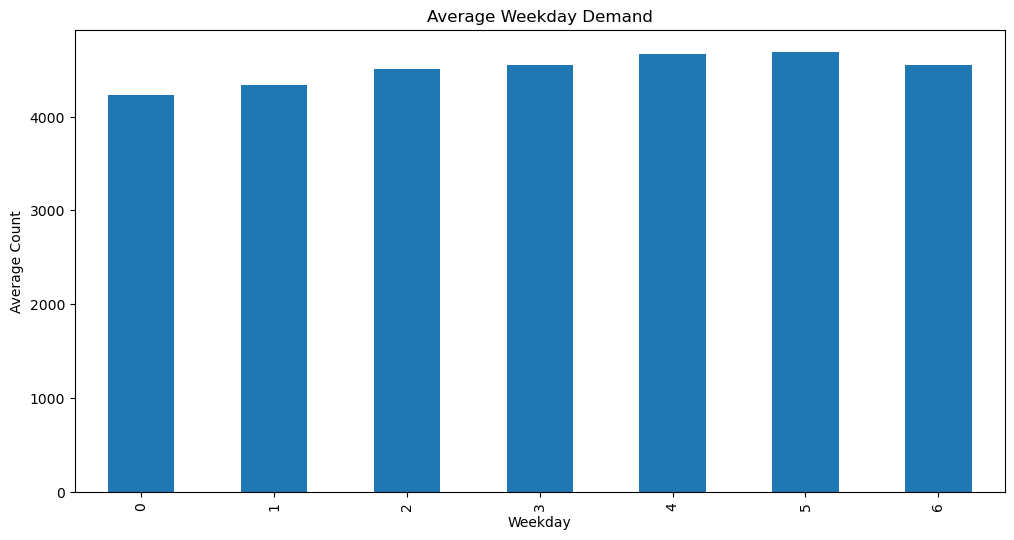

In [135]:
# Durchschnittliche Wochentags-Nachfrage 
plt.figure(figsize=(12, 6))
df.groupby('weekday')['distribution'].mean().plot(kind='bar')
plt.title('Average Weekday Demand')
plt.xlabel('Weekday')
plt.ylabel('Average Count')
plt.show()

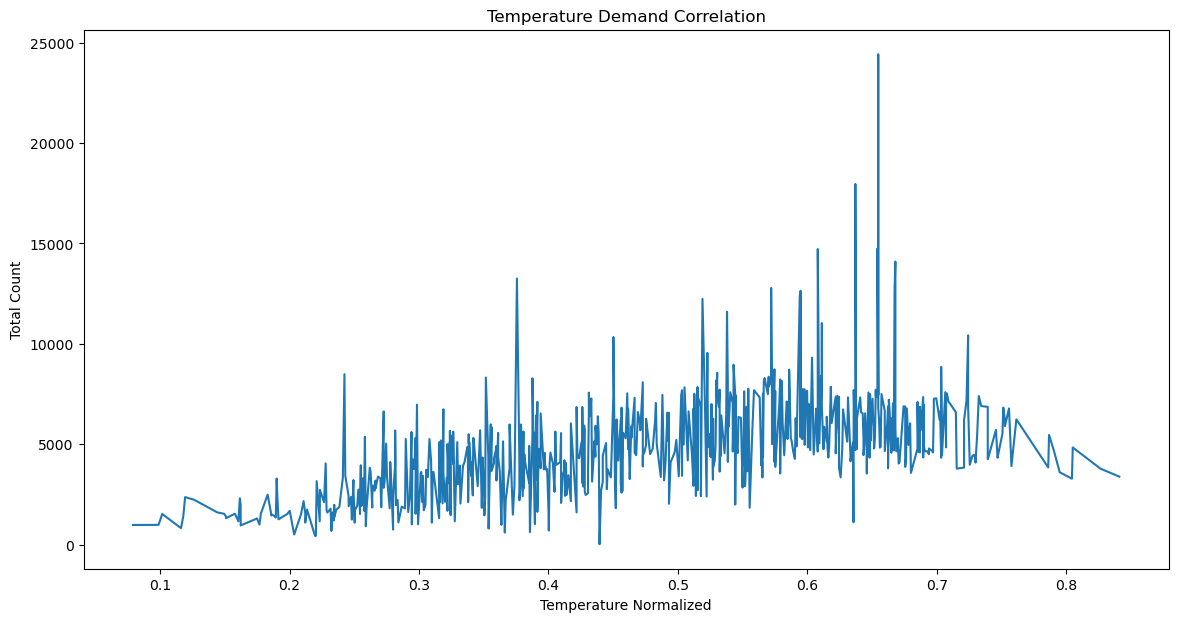

In [136]:
# Zusammenhang zwischen Temperatur und Distribution
plt.figure(figsize=(14, 7))
df.groupby('atemp')['distribution'].sum().plot()
plt.title('Temperature Demand Correlation')
plt.xlabel('Temperature Normalized')
plt.ylabel('Total Count')
plt.show()

Untersuchung von Ausreißern

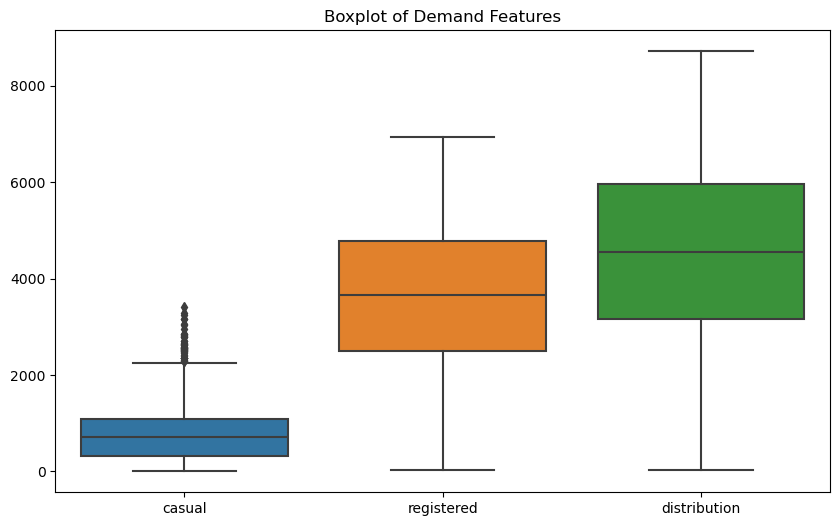

In [150]:
# Boxplot für die Features casual, registered und distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['casual', 'registered', 'distribution']])
plt.title('Boxplot of Demand Features')
plt.show()


In [152]:
# Berechnung Mittelwert und Standardabweichung
mean_distribution = df['casual'].mean()
std_distribution = df['casual'].std()

# Definieren eines Schwellenwertes für Ausreißer (x * Standardabweichungen)
threshold = 3
outliers = df[(df['casual'] > mean_distribution + threshold * std_distribution) | 
              (df['casual'] < mean_distribution - threshold * std_distribution)]

# Ausgabe der Ausreißer
print(f'Anzahl der Ausreißer: {len(outliers)}')
outliers[['date', 'casual']]


Anzahl der Ausreißer: 8


,date,casual
184,2011-07-04,3065
441,2012-03-17,3155
462,2012-04-07,3252
504,2012-05-19,3410
512,2012-05-27,3283
532,2012-06-16,2963
623,2012-09-15,3160
644,2012-10-06,3031


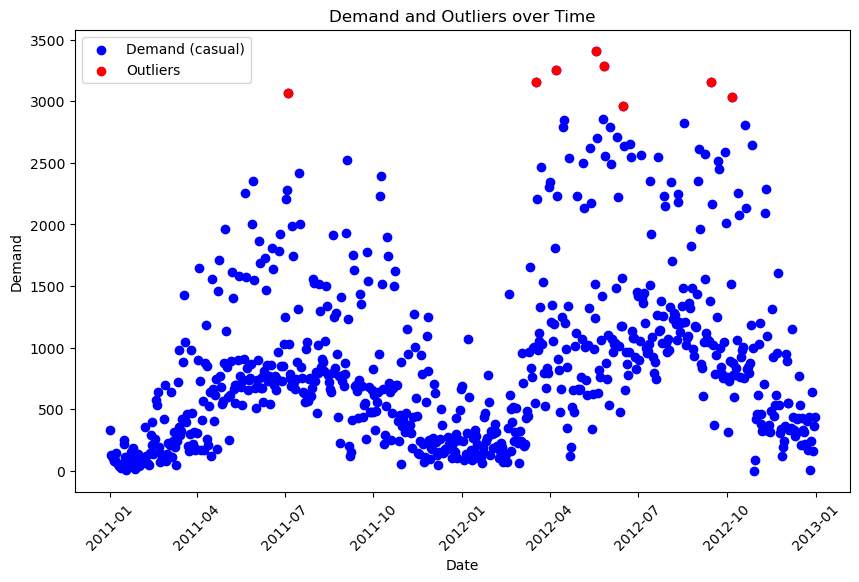

In [153]:
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['casual'], label='Demand (casual)', color='blue')
plt.scatter(outliers['date'], outliers['casual'], color='red', label='Outliers')
plt.title('Demand and Outliers over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.xticks(rotation=45)
plt.show()


<Axes: ylabel='workingday'>

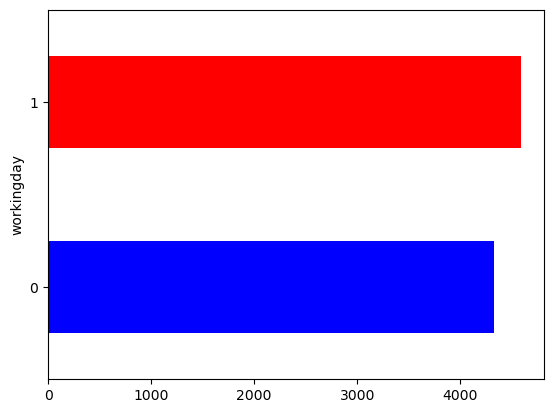

In [137]:
colors = ['blue','red']
df.groupby('workingday')['distribution'].mean().sort_values(ascending=True).tail(20).plot.barh(color=colors)

Preparieren der Daten für die Korrelationsmatrix

In [138]:
# Konvertiere 'date' in Datumsformat
df['date'] = pd.to_datetime(df['date'])

# Erstelle Dummy-Variablen für 'season'
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)


# Exkludiere 'date' von der Korrelation
df_numeric = df.drop(columns=['date'])

print(df.head())
df.dtypes

        date  year  month  holiday  weekday  workingday      temp     atemp  \
0 2011-01-01     0      1        0        6           0  0.344167  0.363625   
1 2011-01-02     0      1        0        0           0  0.363478  0.353739   
2 2011-01-03     0      1        0        1           1  0.196364  0.189405   
3 2011-01-04     0      1        0        2           1  0.200000  0.212122   
4 2011-01-05     0      1        0        3           1  0.226957  0.229270   

        hum  windspeed  casual  registered  distribution  season_Spring  \
0  0.805833   0.160446     331         654           985          False   
1  0.696087   0.248539     131         670           801          False   
2  0.437273   0.248309     120        1229          1349          False   
3  0.590435   0.160296     108        1454          1562          False   
4  0.436957   0.186900      82        1518          1600          False   

   season_Summer  season_Winter  weathersit_Few Clouds  \
0          False

date                        datetime64[ns]
year                                 int64
month                                int64
holiday                              int64
weekday                              int64
workingday                           int64
temp                               float64
atemp                              float64
hum                                float64
windspeed                          float64
casual                               int64
registered                           int64
distribution                         int64
season_Spring                         bool
season_Summer                         bool
season_Winter                         bool
weathersit_Few Clouds                 bool
weathersit_Partly Cloudy              bool
dtype: object

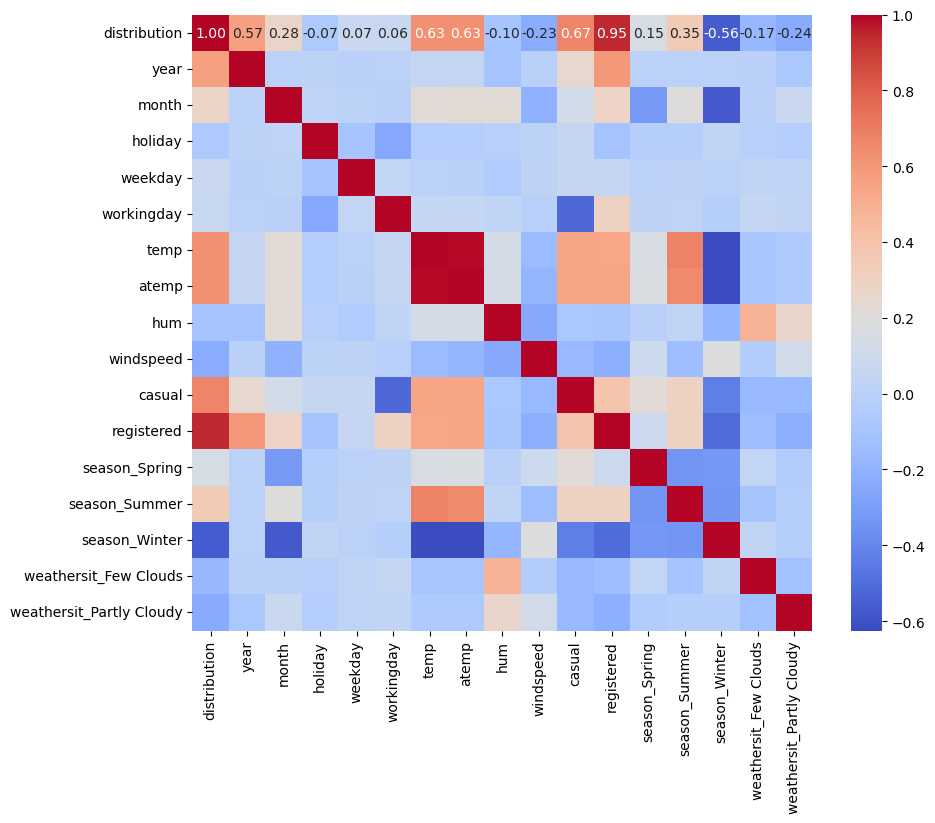

In [139]:
# Berechne Korrelationen nur für numerische Features
corr = df_numeric.corr()

# Sortieren der Matrix so, dass 'distribution' die erste Zeile/Spalte ist
cols = ['distribution'] + [col for col in corr.columns if col != 'distribution']
corr = corr.loc[cols, cols]

# Heatmap erstellen
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Erste Modellierung mittels Linearen Regression

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Features ohne "casual" und Zielvariable definieren
X = df.drop(columns=['distribution', 'date', 'temp', 'casual']) # temp wird wegen Multikollinearität entfernt
y = df['distribution'] # casual + registered = target 

# Features ohne "registered" definieren
X2 = df.drop(columns=['distribution', 'date', 'temp', 'registered']) 
y2 = df['distribution'] # casual + registered = target

print(X2.head())
X.head()

   year  month  holiday  weekday  workingday     atemp       hum  windspeed  \
0     0      1        0        6           0  0.363625  0.805833   0.160446   
1     0      1        0        0           0  0.353739  0.696087   0.248539   
2     0      1        0        1           1  0.189405  0.437273   0.248309   
3     0      1        0        2           1  0.212122  0.590435   0.160296   
4     0      1        0        3           1  0.229270  0.436957   0.186900   

   casual  season_Spring  season_Summer  season_Winter  weathersit_Few Clouds  \
0     331          False          False           True                   True   
1     131          False          False           True                   True   
2     120          False          False           True                  False   
3     108          False          False           True                  False   
4      82          False          False           True                  False   

   weathersit_Partly Cloudy  
0       

,year,month,holiday,weekday,workingday,atemp,hum,windspeed,registered,season_Spring,season_Summer,season_Winter,weathersit_Few Clouds,weathersit_Partly Cloudy
0,0,1,0,6,0,0.363625,0.805833,0.160446,654,False,False,True,True,False
1,0,1,0,0,0,0.353739,0.696087,0.248539,670,False,False,True,True,False
2,0,1,0,1,1,0.189405,0.437273,0.248309,1229,False,False,True,False,False
3,0,1,0,2,1,0.212122,0.590435,0.160296,1454,False,False,True,False,False
4,0,1,0,3,1,0.229270,0.436957,0.186900,1518,False,False,True,False,False


In [141]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell erstellen und trainieren
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Modellvorhersage und Bewertung
y_pred = linreg.predict(X_test)

# R²-Score berechnen
r2 = r2_score(y_test, y_pred)
print(f'R²-Score: {r2}')

# MSE berechnen
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

R²-Score: 0.9709543206963918
MSE: 116469.75499941391


In [157]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Modell erstellen und trainieren
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Modellvorhersage und Bewertung
y_pred = linreg.predict(X_test)

# R²-Score berechnen
r2 = r2_score(y_test, y_pred)
print(f'R²-Score: {r2}')

# MSE berechnen
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

R²-Score: 0.8912128544200786
MSE: 436223.64828647755
